# Lab 6: Statistical Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


## Read in and prepare the data

In [2]:
data = pd.read_csv("counties.csv")
# print(df.columns.tolist())

### Basic Feature Engineering

In [3]:
# per-capita metrics
data["covid-deaths_total_per_capita"] = data["covid-deaths/2022-03-01"] / data["population/2019"]
data["covid-confirmed_total_per_capita"] = data["covid-confirmed/2022-03-01"] / data["population/2019"]

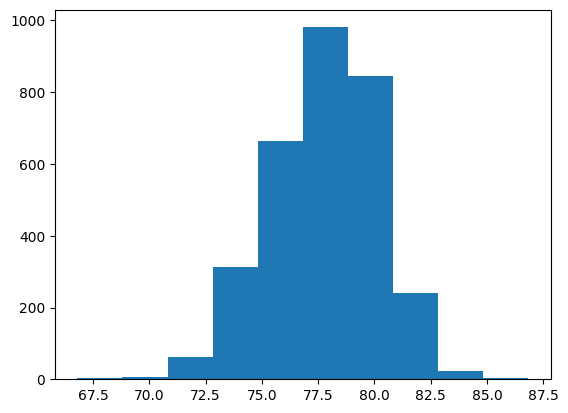

In [4]:
# above_average_life-expectancy (boolean)
plt.hist(x=data['life-expectancy']) 
# looks normally distributed, so mean should be fine
avg_life_exp = data["life-expectancy"].median()
data["above_average_life-expectancy"] = np.where(data["life-expectancy"] >= avg_life_exp, True, False)

In [5]:
# largest industry by number of employees
industry_df = data[data.columns[data.columns.str.endswith('employees')]].fillna(0)
data["biggest_industry"] = industry_df.apply(lambda row: row.idxmax().removeprefix("industry/").removesuffix("/employees"), axis=1)


In [6]:
# modal edu level
edu_df = data[data.columns[data.columns.str.startswith('edu/')]]
data["county_modal_ed"] = edu_df.apply(lambda row: row.idxmax().removeprefix("edu/"), axis=1)

## Life Expectancy

In [7]:
X = ['state'
     ,'longitude (deg)'
     ,'latitude (deg)'
     ,'noaa/temp'
     ,'noaa/altitude'
     ,'male'
     ,'deaths/suicides'
     ,'deaths/homicides'
     ,'bls/2020/unemployed'
     ,'avg_income'
     ,'covid-deaths_total_per_capita'       #const
     ,'covid-confirmed_total_per_capita'    #const
     ,'covid-vaccination/2021-12-01'
     ,'county_modal_ed'                     #const
     ,'poverty-rate'
     ,'cost-of-living/living_wage'
     ,'cost-of-living/food_costs'
     ,'cost-of-living/medical_costs'
     ,'cost-of-living/housing_costs'
     ,'cost-of-living/tax_costs'
     ,'health/Average Number of Mentally Unhealthy Days'
     ,'health/% Smokers'
     ,'health/% Adults with Obesity'
     ,'health/% Physically Inactive'
     ,'health/% Long Commute - Drives Alone'
     ,'biggest_industry']                   #const

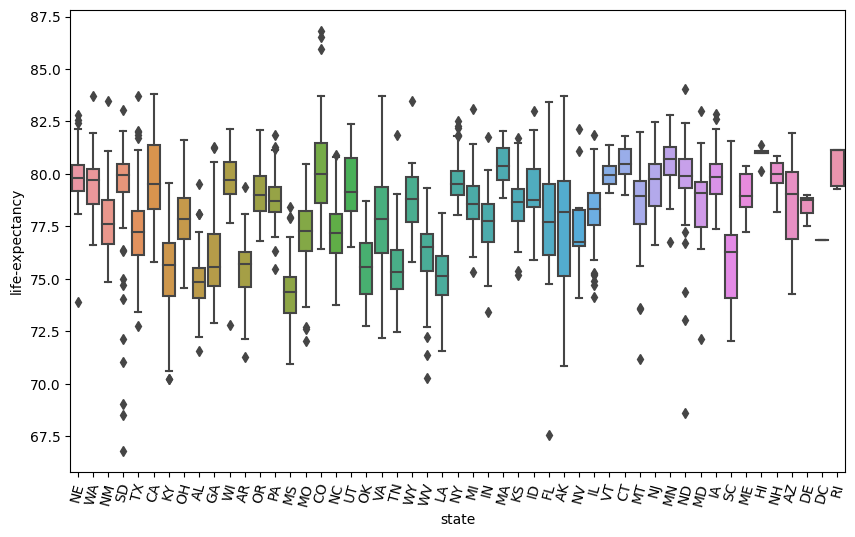

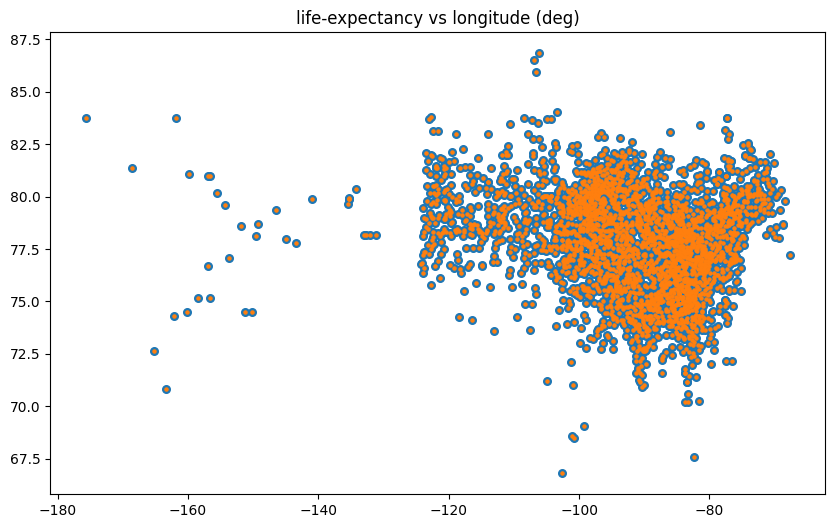

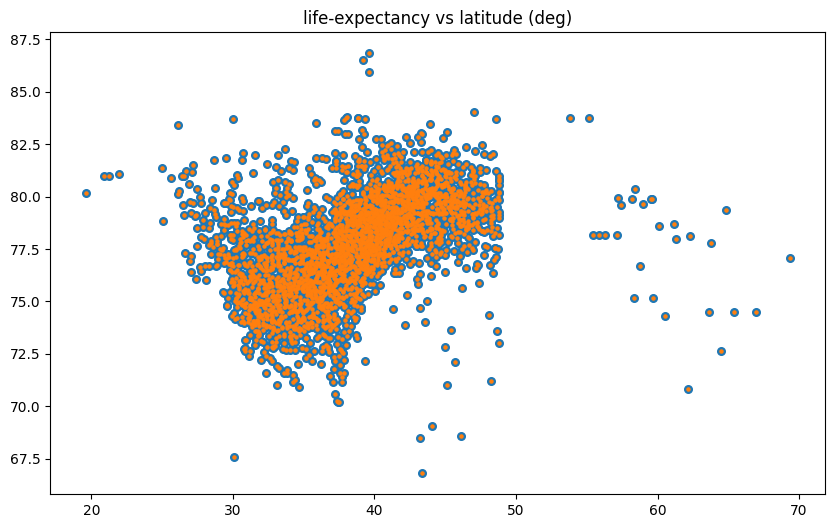

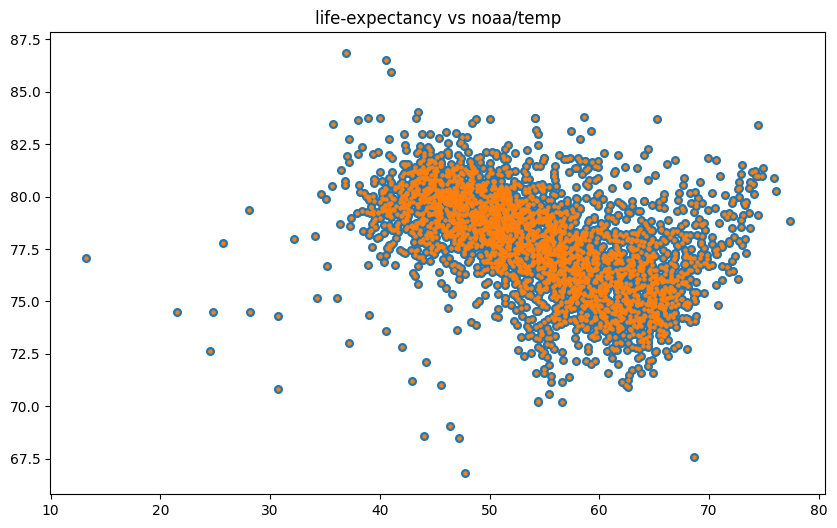

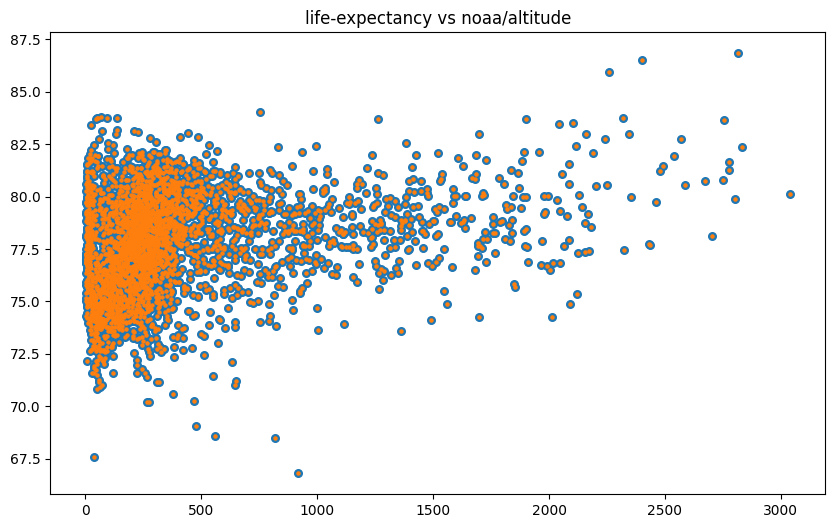

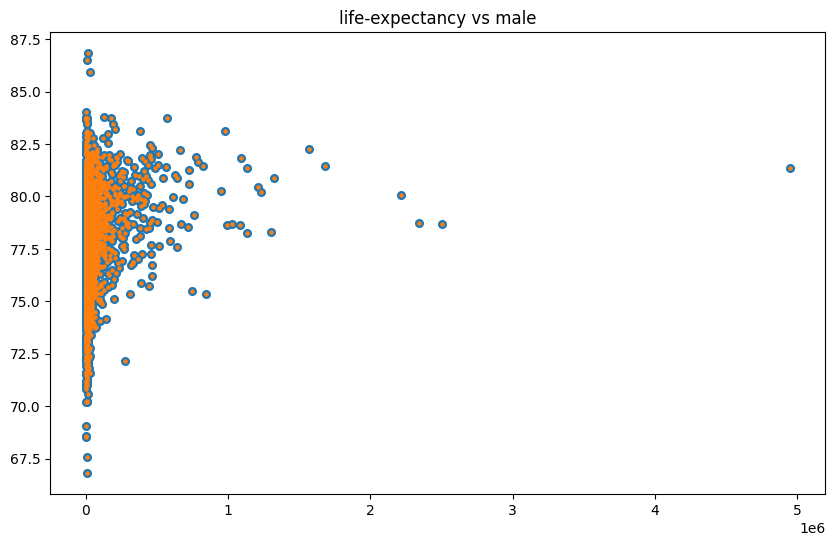

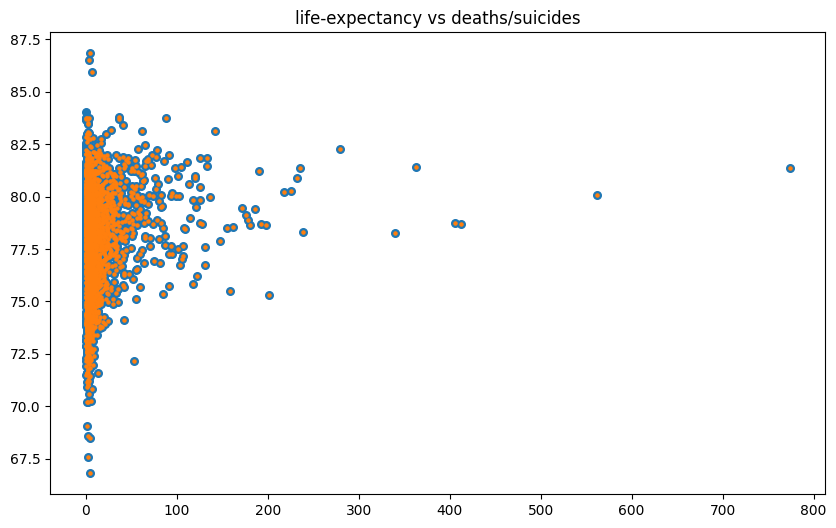

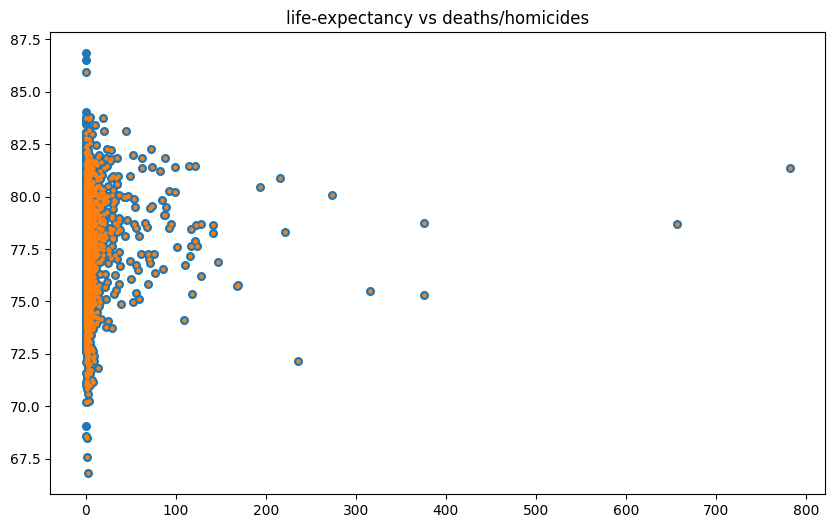

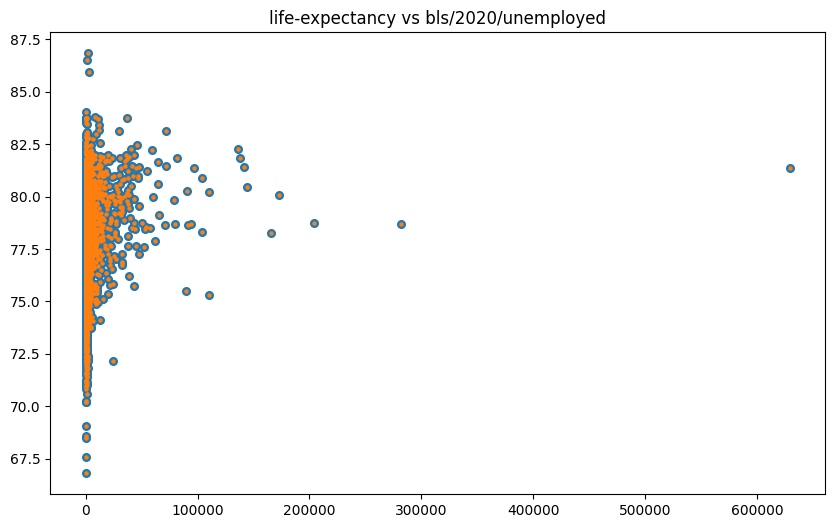

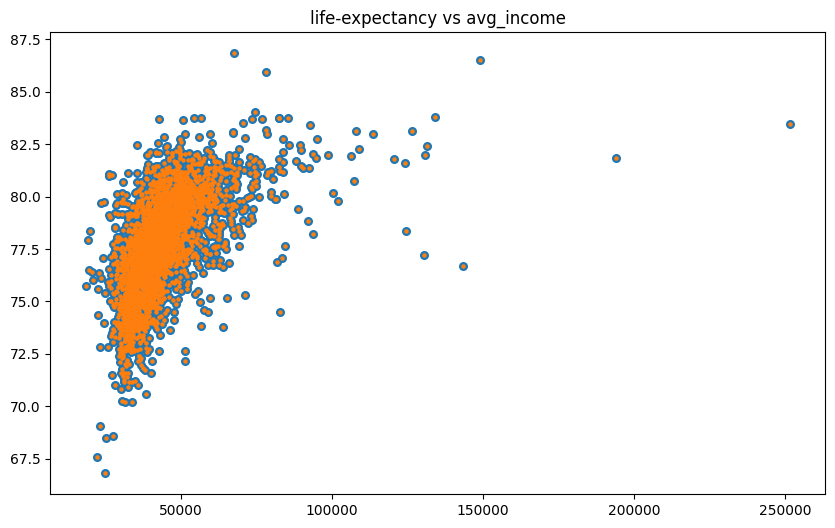

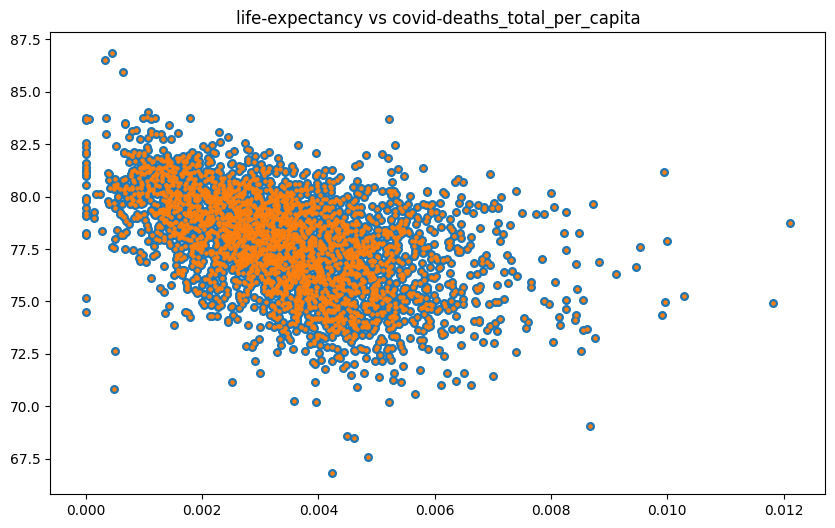

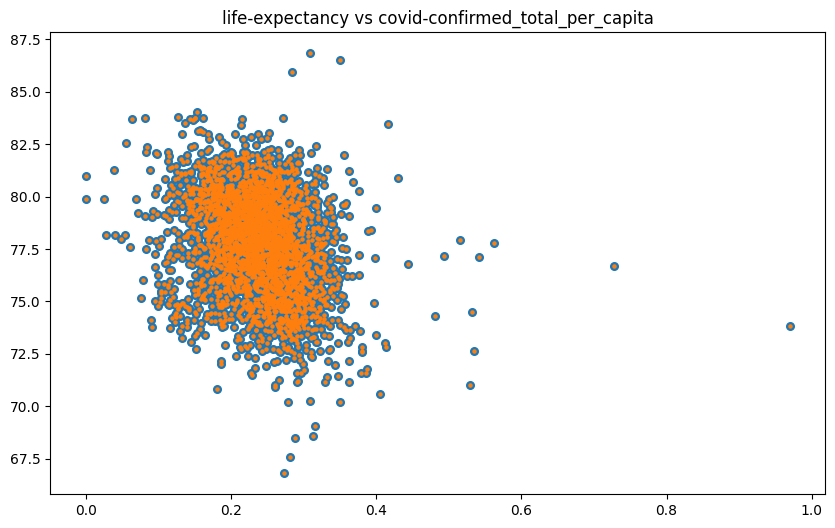

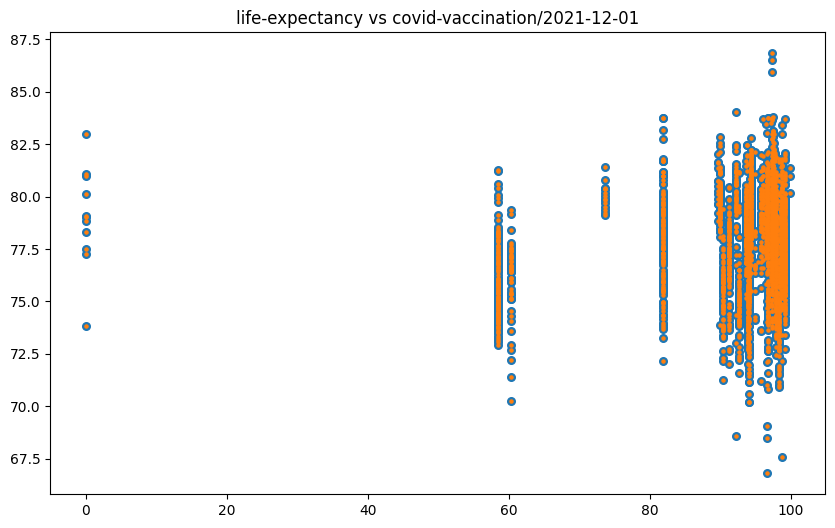

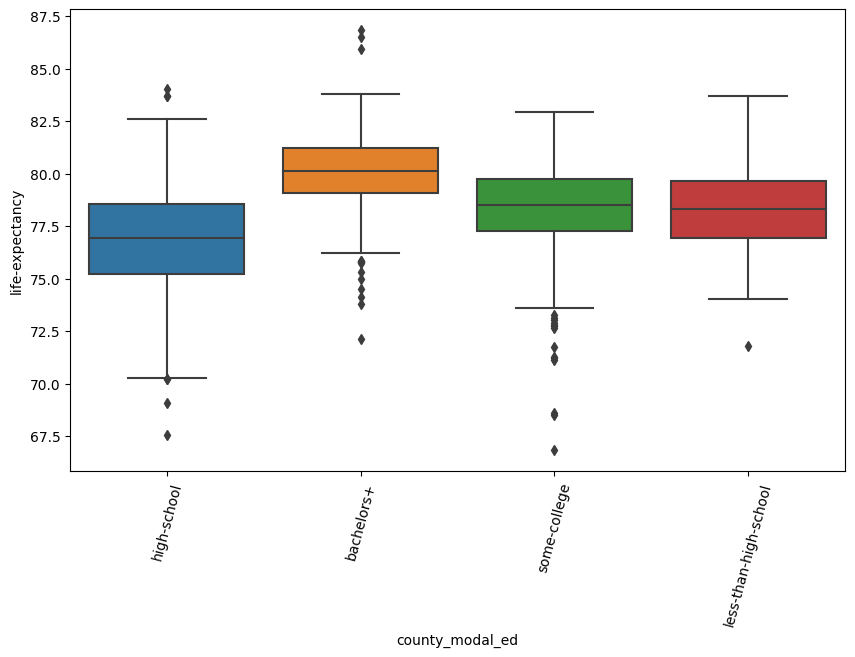

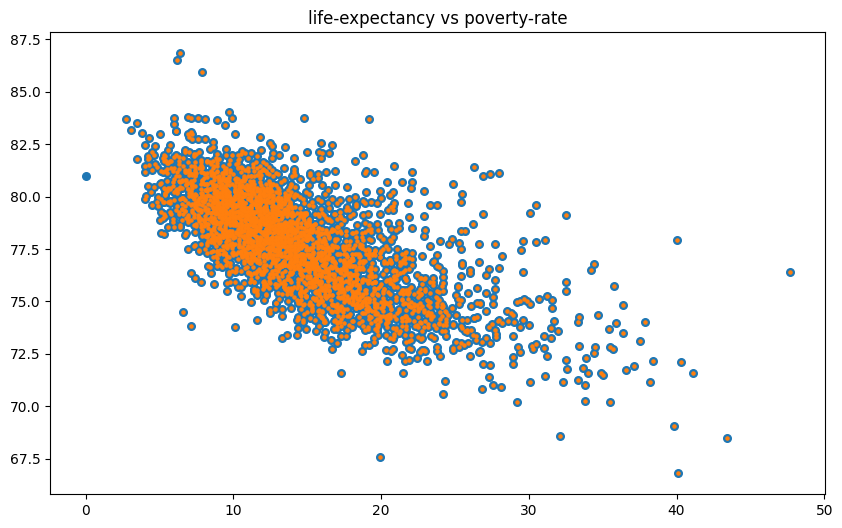

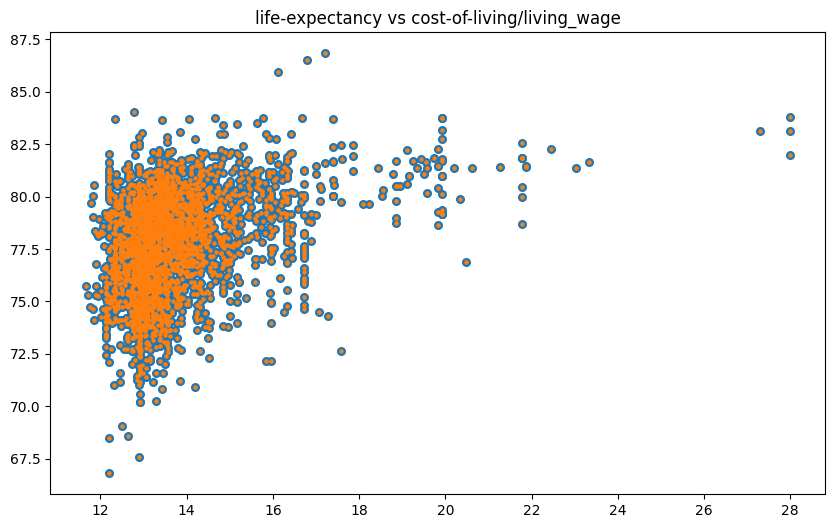

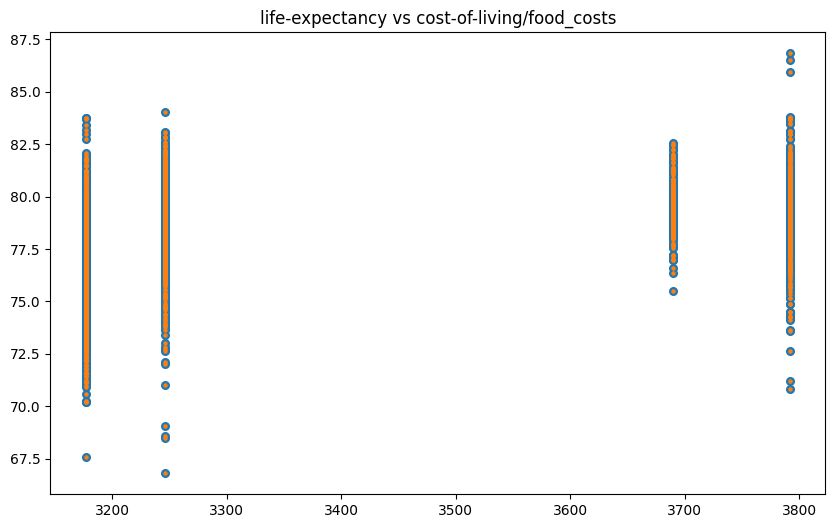

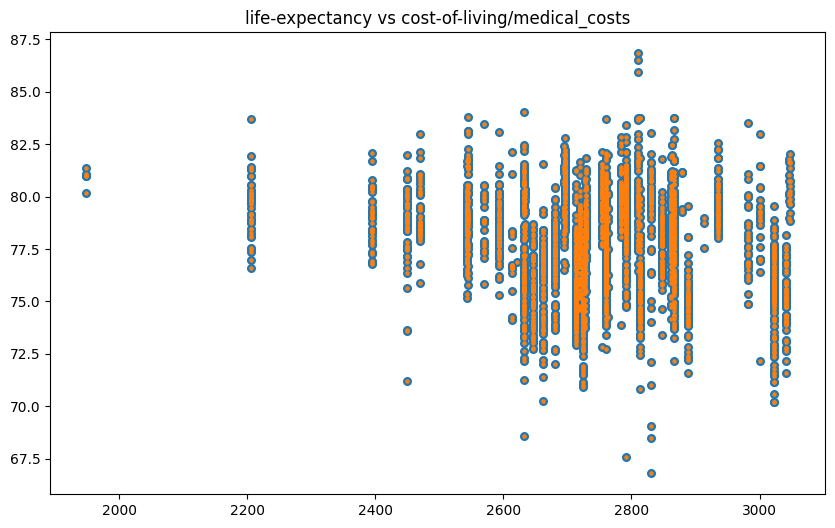

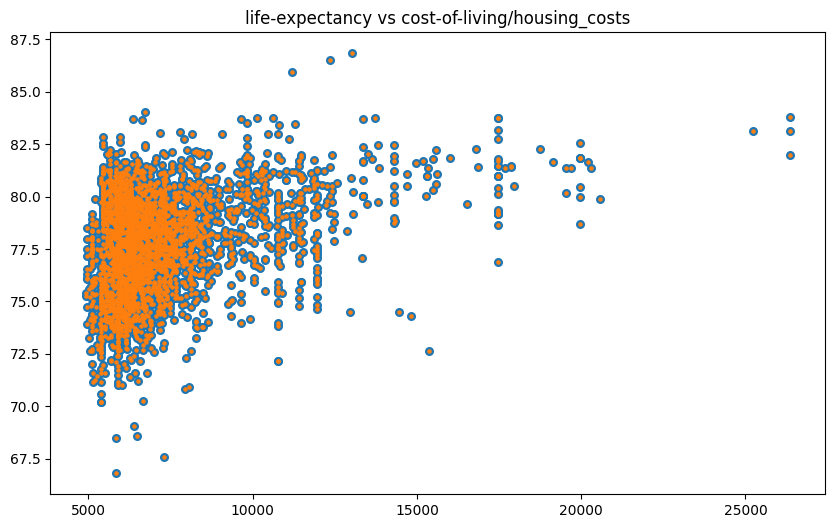

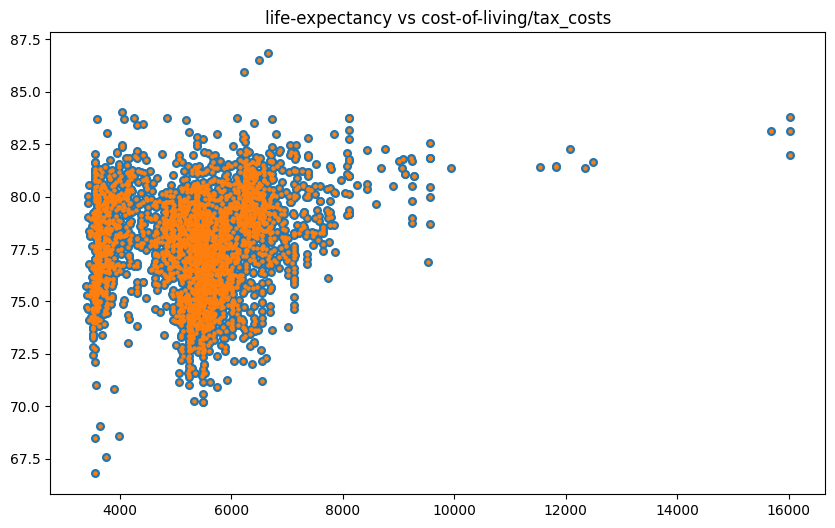

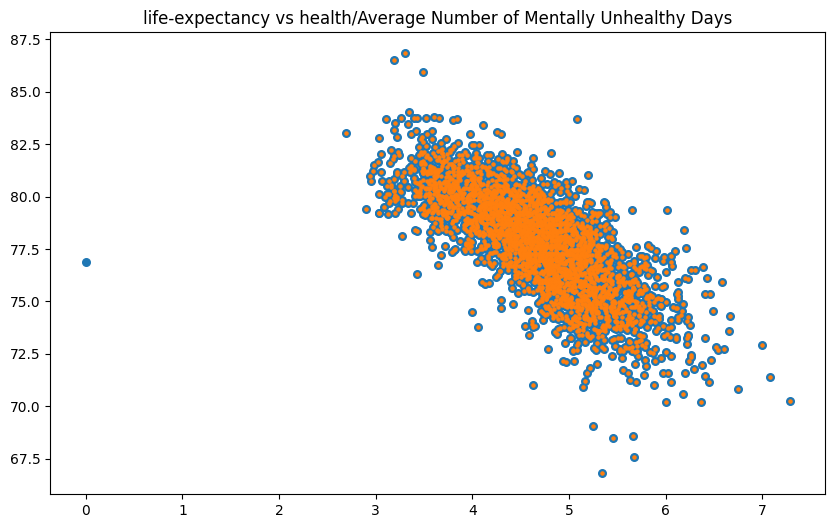

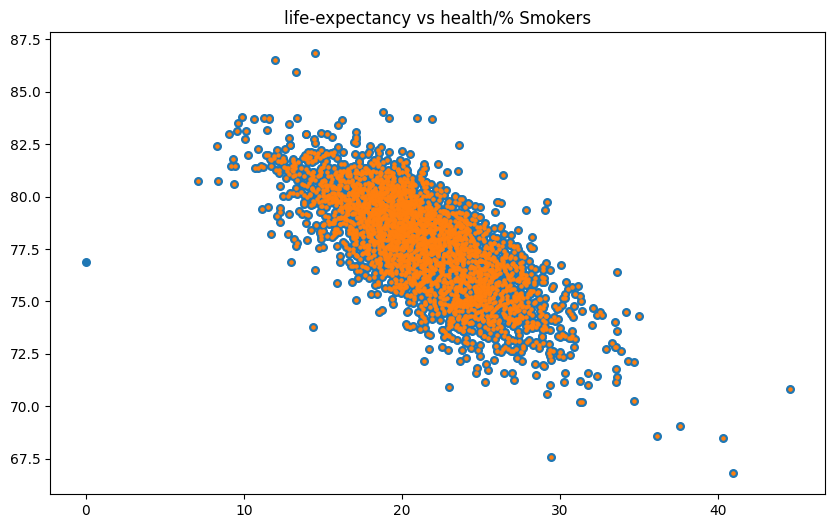

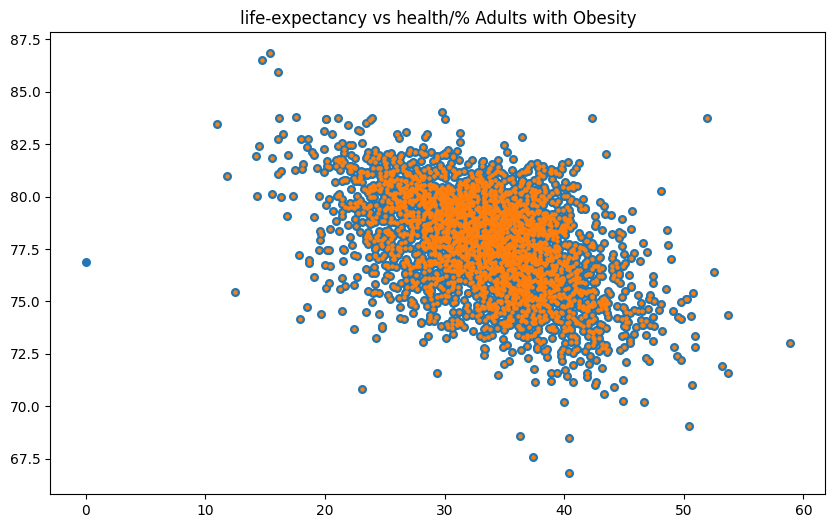

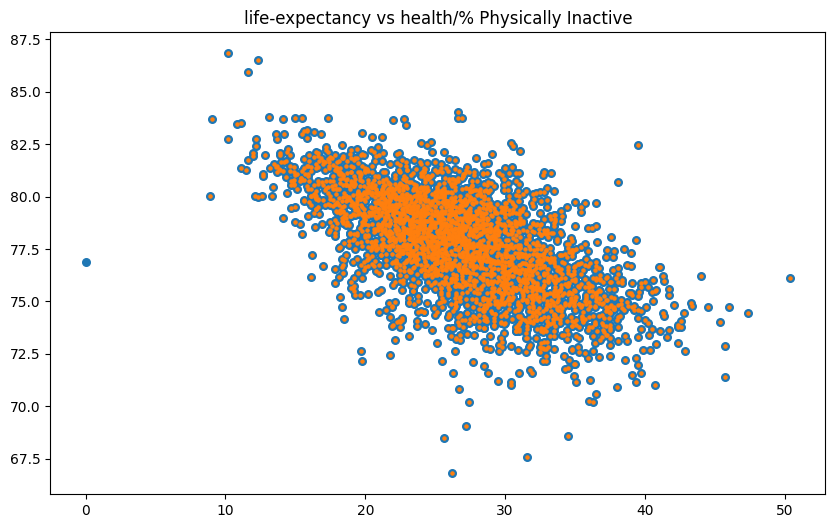

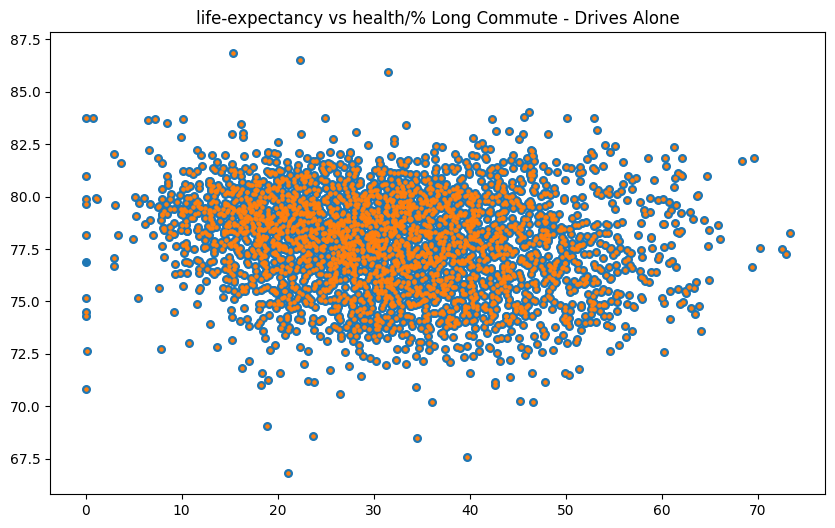

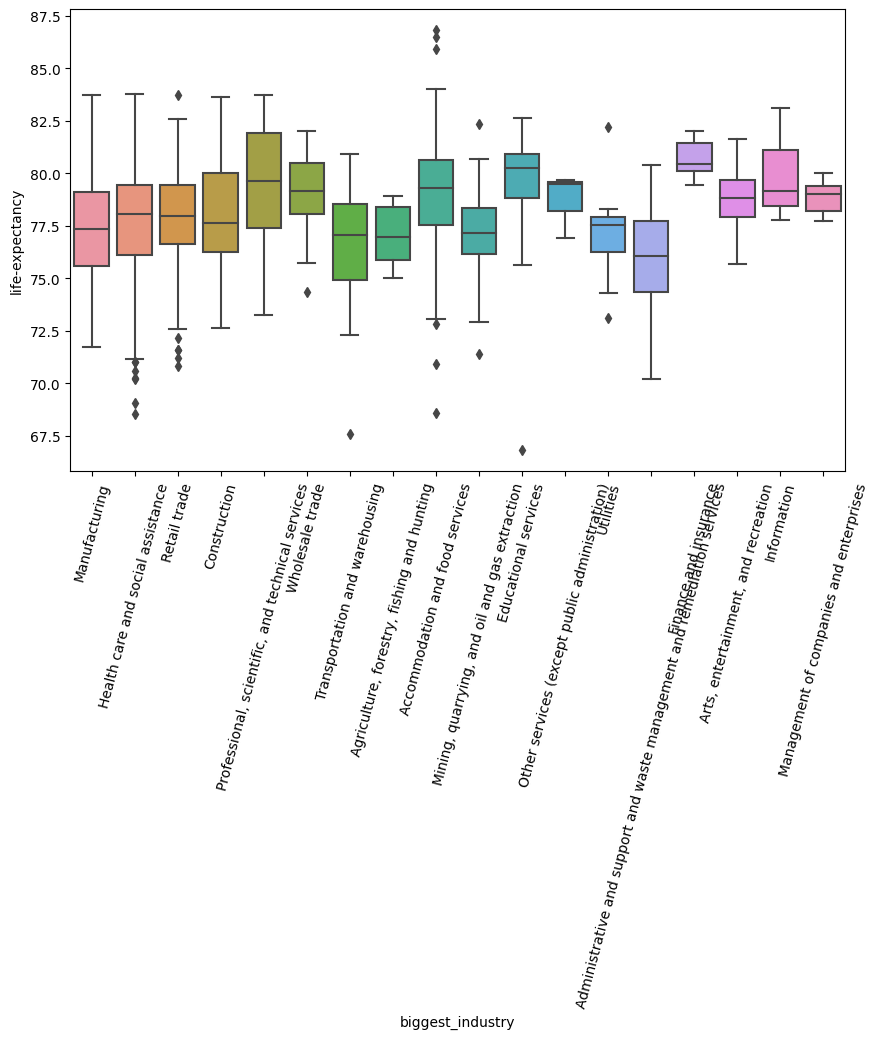

In [8]:
results = {}
for pot_pred in X:
    if (data[pot_pred].dtype != "object"):
        # fill = data[pot_pred].median()
        # fill = data[pot_pred].mean()
        fill = 0
        temp = data[pot_pred].fillna(fill)
        plt.figure(figsize=(10, 6))
        plt.scatter(temp, data['life-expectancy'], s=30)
        plt.title("life-expectancy vs "+ pot_pred)
        dropped = data.dropna(subset=[pot_pred], inplace=False)
        plt.scatter(dropped[pot_pred], dropped['life-expectancy'], s=5)
        plt.show()
        # temp = data[pot_pred]
        output = scipy.stats.linregress(data['life-expectancy'], temp)
        
    else:
        samples_by_group = []
        dropped = data.dropna(subset=[pot_pred], inplace=False)
        
        plt.figure(figsize=(10, 6))
        fig = sns.boxplot(dropped, y ="life-expectancy", x=pot_pred)
        fig.set_xticklabels(fig.get_xticklabels(), rotation=75)
        plt.show()

        for value in set(data[pot_pred]):
            samples_by_group.append(data["life-expectancy"][data[pot_pred]==value])
        output = scipy.stats.kruskal(*samples_by_group)
    results.update({pot_pred: output})


In [9]:
# results

In [10]:
table = pd.DataFrame(columns=["rval", 'test statistic', "p-value", "stat significant"])
for name in X:
    if (data[name].dtype != "object"):
        rval = results.get(name).rvalue
        tstat = rval * (((1 - rval ** 2) / (len(data) - 2)) ** 0.5)
    else:
        rval = float('nan')
        tstat = results.get(name).statistic
    pval = results.get(name).pvalue
    sig = pval  < 0.05
    # entry = pd.DataFrame({'variable name': name, 'test statistic': tstat, "p-value": pval, "stat significant": sig})
    # table = pd.concat([table, entry.to_frame().T], ignore_index=True)
    #changed method to preserve precision
    table.loc[name] = [rval, tstat, pval, sig]
table

,rval,test statistic,p-value,stat significant
state,NaN,1719.974217,0.000000e+00,True
longitude (deg),-0.185017,-0.003245,1.358906e-25,True
latitude (deg),0.437397,0.007019,5.304361e-147,True
noaa/temp,-0.472559,-0.007432,1.463919e-174,True
noaa/altitude,0.268992,0.004623,3.235692e-53,True
male,0.170727,0.003002,5.584895e-22,True
deaths/suicides,0.151404,0.002671,1.431329e-17,True
deaths/homicides,0.031160,0.000556,8.074838e-02,False
bls/2020/unemployed,0.142296,0.002514,1.111997e-15,True
avg_income,0.564267,0.008314,1.111643e-263,True


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


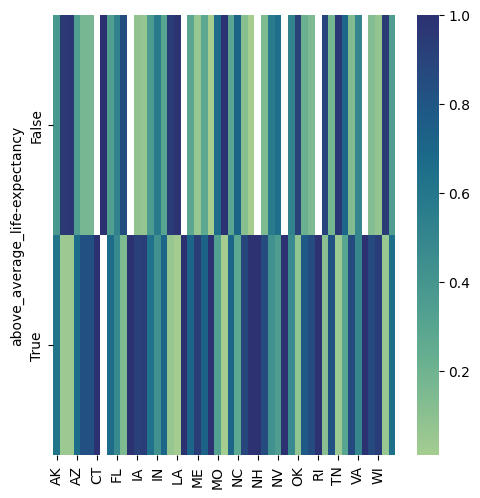

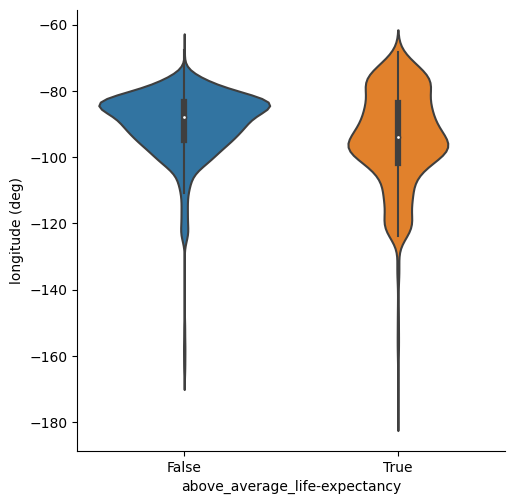

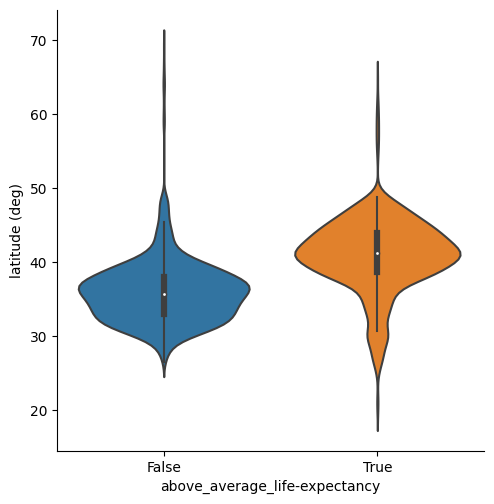

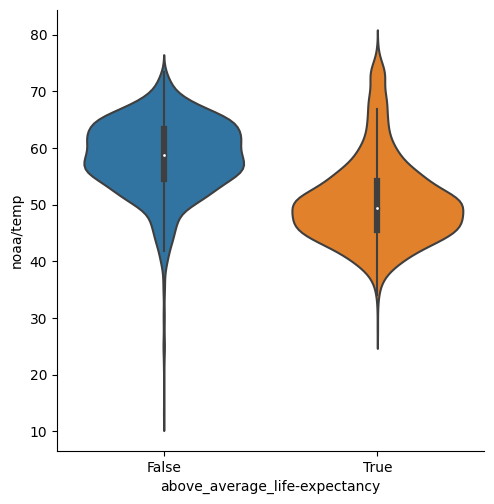

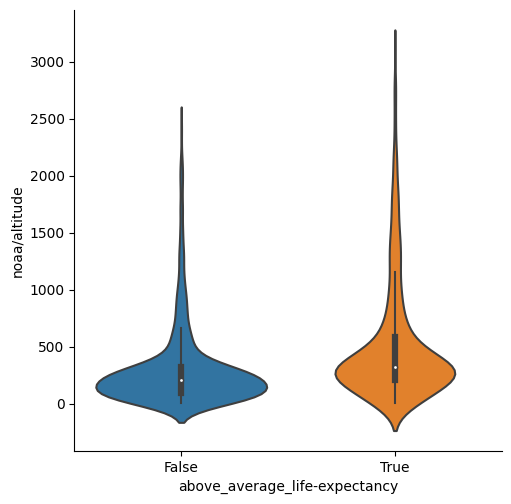

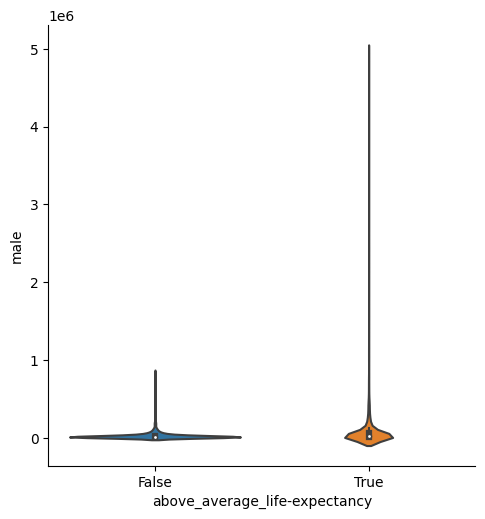

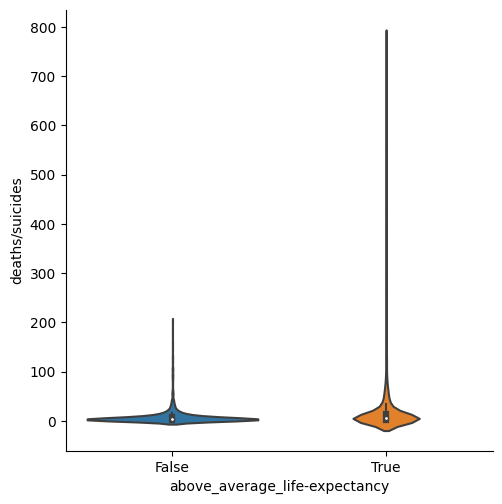

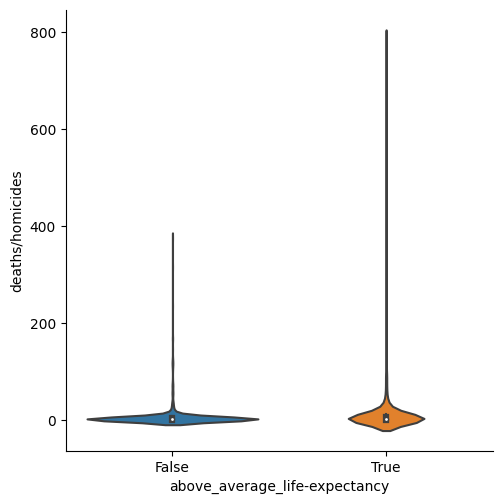

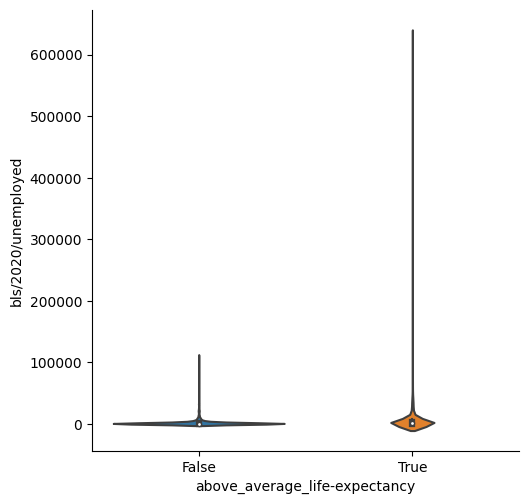

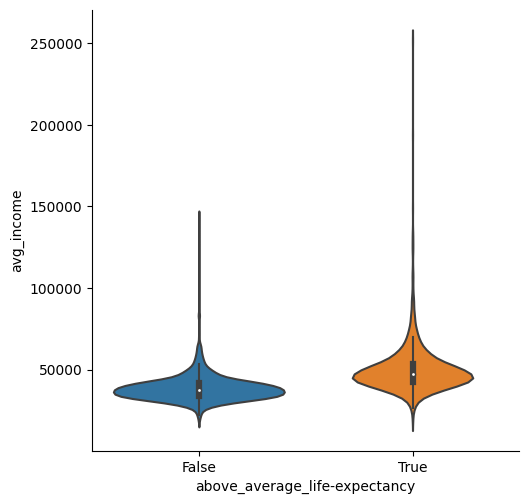

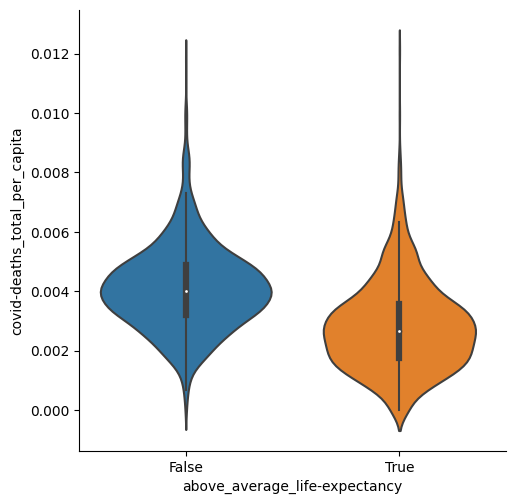

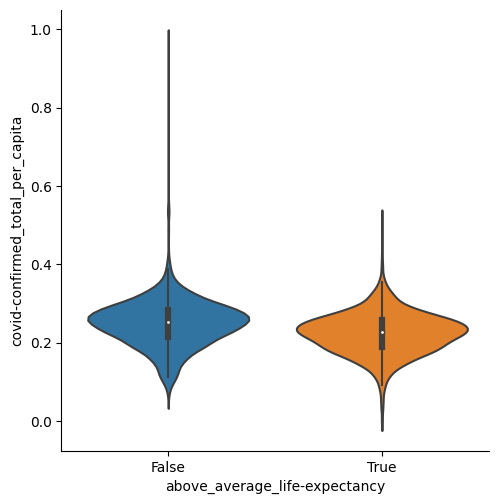

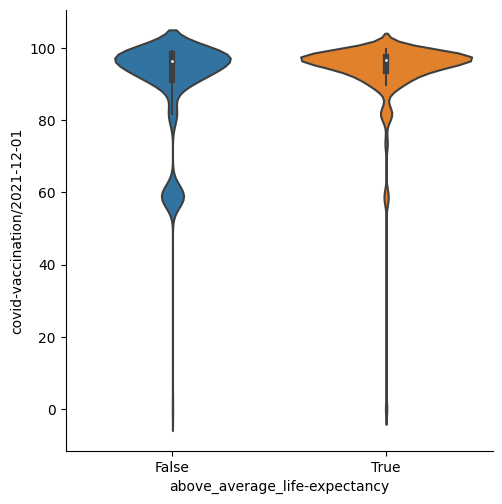

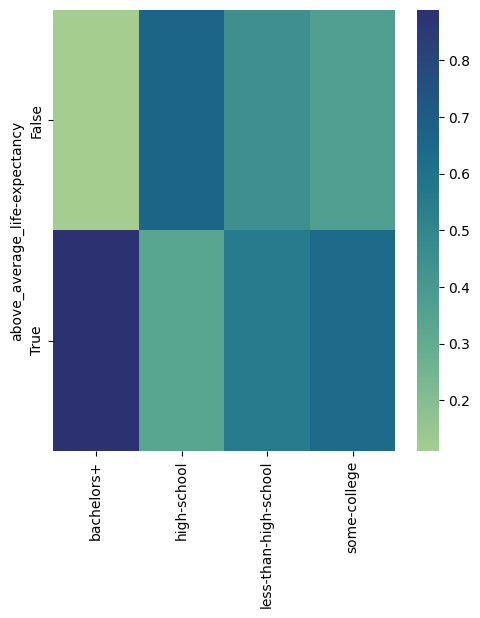

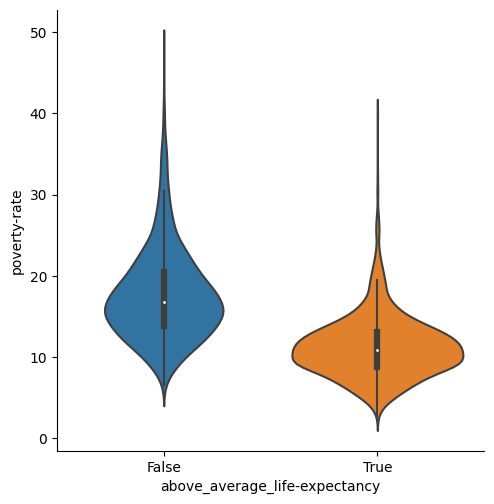

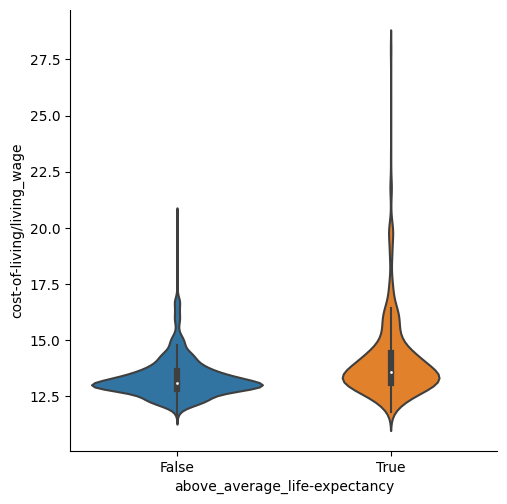

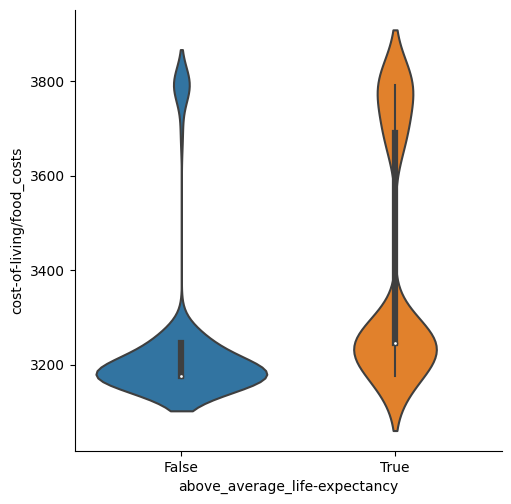

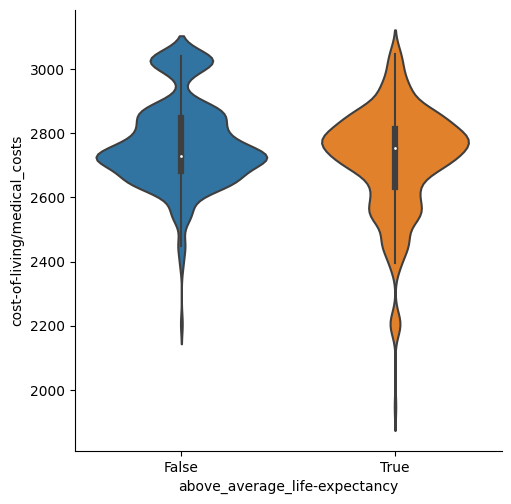

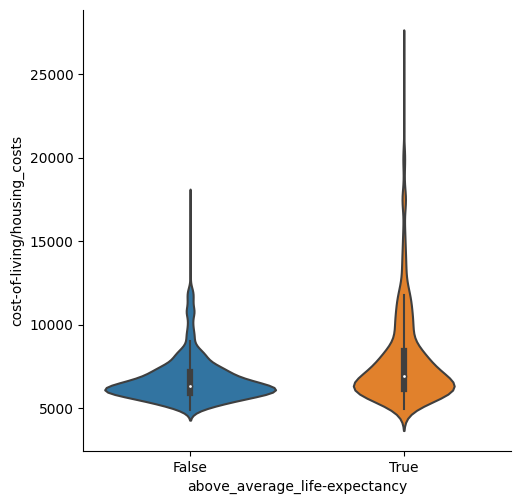

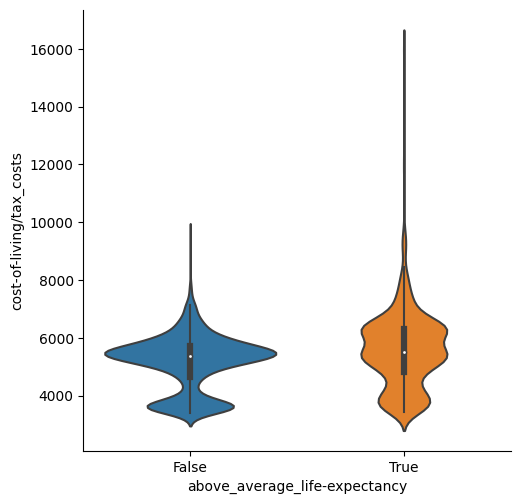

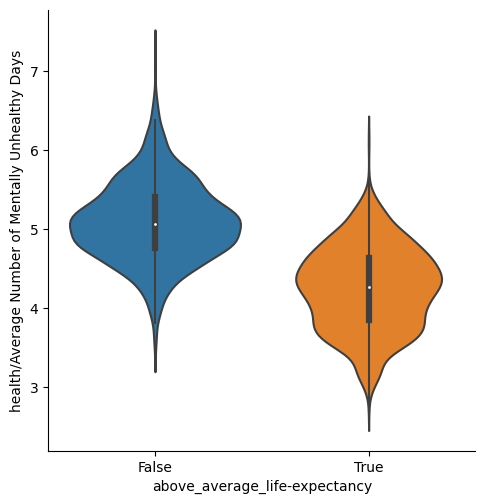

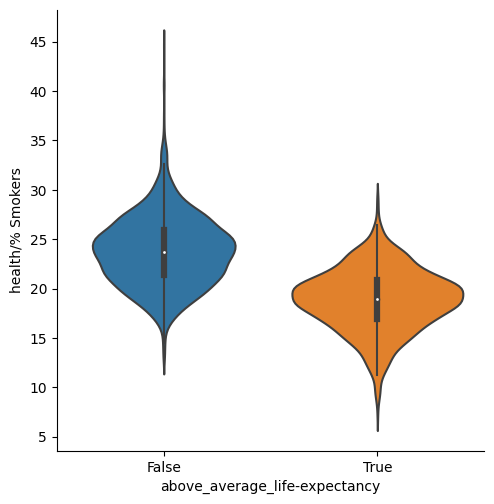

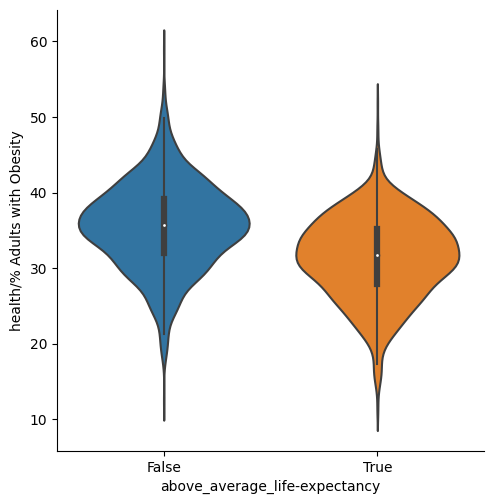

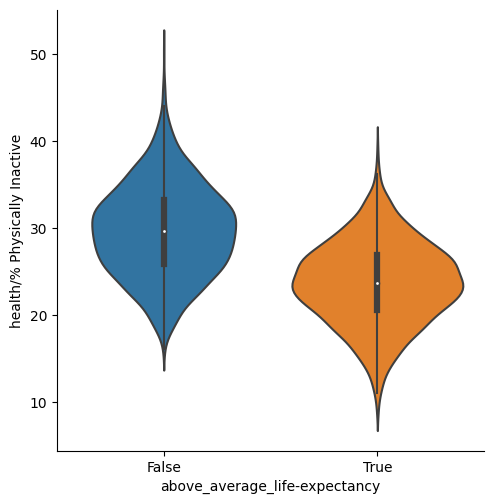

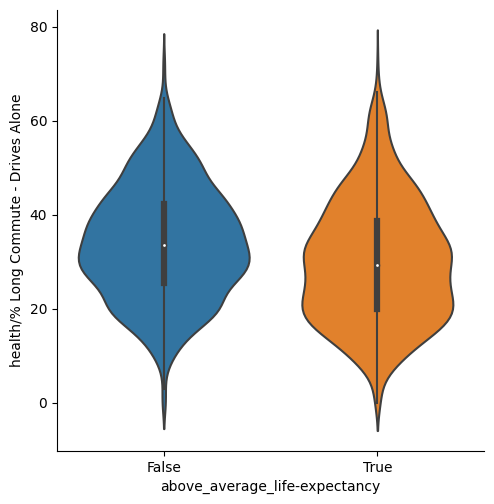

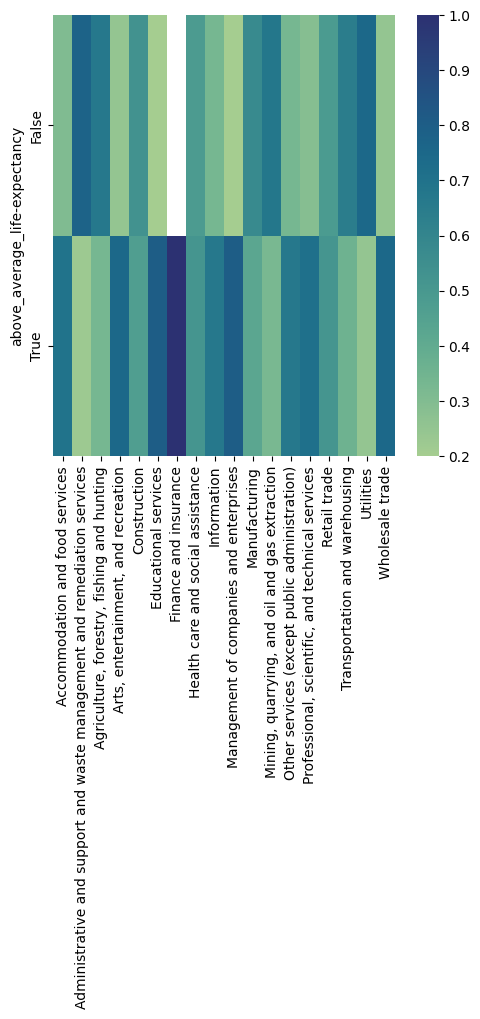

In [11]:
results_above = {}
for pot_pred in X:
    if (data[pot_pred].dtype != "object"):
        samples_by_group = []
        dropped = data.dropna(subset=[pot_pred], inplace=False)
        sns.displot()
        sns.violinplot(dropped, x="above_average_life-expectancy", y=pot_pred)

        fill = 0
        temp = data[pot_pred].fillna(fill)

        for value in set(data["above_average_life-expectancy"]):
            samples_by_group.append(temp[data["above_average_life-expectancy"]==value])
        output = scipy.stats.kruskal(*samples_by_group)
        
    else:
        sns.displot()
        count_pl = pd.pivot_table(data, values='name', index ='above_average_life-expectancy', columns=pot_pred, aggfunc='count') / data[pot_pred].value_counts()
        sns.heatmap(data=count_pl, cmap="crest")

        combination_counts = pd.crosstab(data[pot_pred], data['above_average_life-expectancy'])
        output = scipy.stats.chi2_contingency(combination_counts)
        
    results_above.update({pot_pred: output})

In [12]:
table = pd.DataFrame(columns=['test statistic', "p-value", "stat significant"])
for name in X:
    tstat = results_above.get(name).statistic
    pval = results_above.get(name).pvalue
    sig = pval  < 0.05
    table.loc[name] = [tstat, pval, sig]
# print(table.to_latex())
table

,test statistic,p-value,stat significant
state,1437.735370,3.813519e-268,True
longitude (deg),83.701246,5.754895e-20,True
latitude (deg),897.041083,4.315736e-197,True
noaa/temp,853.567930,1.218689e-187,True
noaa/altitude,252.901341,6.052509e-57,True
male,18.520052,1.681262e-05,True
deaths/suicides,4.524663,3.340965e-02,True
deaths/homicides,113.011751,2.144998e-26,True
bls/2020/unemployed,17.394500,3.037036e-05,True
avg_income,1024.942989,6.801823e-225,True
